# Polynomial And Linear Regression On Washington Housing Dataset 

#### In this notebook we will do a comparison of linear regression and polynomial regression with the same dataset as previously, but this time we normalized the data

The dataframe we are using can be found as a CSV file [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/norm_model.csv).

These are the definition of the variables (features) we are using in this model:

- bedrooms = Number of bedrooms in the real estate unit
- bathrooms = Number of bathrooms in the real estate unit
- sqft_living = Living space in square feet
- floors = Number of floors 
- waterfront = Does the unit have a view of the water? 0=No 1=Yes
- view = Valuation of a view on a scale from 0-4
- condition = The overall condition of the unit
- grade = Similar to condition, this describes the overall grade of the unit
- yr_renovated = Was there a renovation 0=No 1=Yes

We decided to keep all but one outlier in the dataset and after several tries, we also decided to not normalize the data, meaning we only removed highly correlated variables.
The reasons for this are explained in the data wrangling notebook that can be found [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/2.Data%20wrangling.ipynb).

An initial overview of the dataset and an exploration of the data can be found [here](https://github.com/Caparisun/Linear_Regression_Project/blob/master/Notebooks_and_data/1.basic_data_exploration.ipynb).
***

##### Disclaimer
To run all algorithnms in this notebook, you need the following library:
    
- [mlxtend](http://rasbt.github.io/mlxtend/) (please klick for documentation of the library)

Install the library using conda with the following command:

    conda install -c conda-forge mlxtend

For pip install of the library use:

    pip install mlxtend
    
***

In [1]:
# Import all needed libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd  
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore") # ignore warning from libraries 
import math 

In [2]:
# reading the raw data into a pandas dataframe 
df = pd.read_csv('norm_model.csv')

In [3]:
# visualize the head to check if the import worked
df.head()

,Unnamed: 0,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,price
0,0,0.15625,0.333333,0.154138,0.4,0.0,0.0,0.50,0.4,0.0,0.029126
1,1,0.15625,0.333333,0.154138,0.4,0.0,0.0,0.50,0.4,0.0,0.026502
2,2,0.09375,0.166667,0.128322,0.0,0.0,0.0,0.75,0.5,0.0,0.074718
3,3,0.06250,0.066667,0.082764,0.0,0.0,0.0,0.50,0.4,0.0,0.042246
4,4,0.06250,0.066667,0.080486,0.2,0.0,0.0,0.75,0.3,0.0,0.020598


In [4]:
# drop unnecessary 'Unnamed: 0' column
df = df.drop(['Unnamed: 0',], axis = 1) 

In [5]:
# check dataframe head again to see if that worked
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,price
0,0.15625,0.333333,0.154138,0.4,0.0,0.0,0.50,0.4,0.0,0.029126
1,0.15625,0.333333,0.154138,0.4,0.0,0.0,0.50,0.4,0.0,0.026502
2,0.09375,0.166667,0.128322,0.0,0.0,0.0,0.75,0.5,0.0,0.074718
3,0.06250,0.066667,0.082764,0.0,0.0,0.0,0.50,0.4,0.0,0.042246
4,0.06250,0.066667,0.080486,0.2,0.0,0.0,0.75,0.3,0.0,0.020598


***

### Linear regression model
***
#### In the next section we are preparing the data for the model training

In [6]:
'''Defining the variables:
Y as 'price' - the variable we want to predict,
and X as all other columns of our dataframe.'''

y = df['price'] # define Y as price, the variable that will be predicted

X = df.drop(['price'], axis=1) # define X as all other variables except price

### Split the data into training and testing sets
***
#### The next step will split our data into a train and a test sample so we can train the model and get a benchmark for its precision

In [7]:
'''We use sklearn train_test_split function to achieve this
the test_size is the percentage of the data we use to test our model with, 
meaning we feed it 70% of the available data. The random state generates a 
random number for the split to ensure consistency'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15117, 9)
(6479, 9)
(15117,)
(6479,)


The output shows the size of the individual train and test datasets for X and Y 

### Perform the prediction with the linear regression model
***
#### The following cells of code will run the test model and return the results

In [8]:
# Fitting the training data into the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [9]:
#This is the result equation's intercept (the constant)
lin_model.intercept_

-0.05453772965165825

In [10]:
#These are estimated coefficients 
lin_model.coef_

array([-0.13998479, -0.01259601,  0.33716828, -0.0037407 ,  0.07977567,
        0.03165122,  0.03133083,  0.13582481,  0.01838909])

In [11]:
# A predicition array is presented
predictions  = lin_model.predict(X_test)
predictions

array([0.09557303, 0.02302166, 0.07123501, ..., 0.04096887, 0.02765219,
       0.09934816])

In [12]:
#This is the r2 score
r2 = r2_score(y_test, predictions)
r2

0.6076623894802808

In [13]:
#This is the RMSE
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

0.028486225035310193


### Below, you can see the regression model's predictions compared against the y_test values

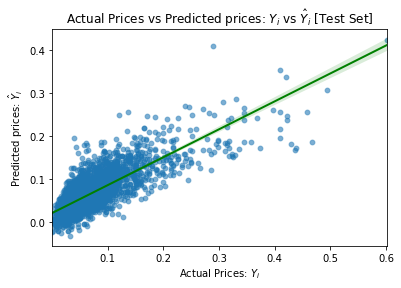

In [14]:
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()


***
### Polynomial regression model
***
In this section, the model from the previous section is converted into a Polynomial model of order 2. After this, a regression model is run and predictions are obtained.

In [15]:
def create_polynomial_regression_model(degree):
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # With this line of code, the previous's section model is transformed into higher features
  X_train_poly = poly_features.fit_transform(X_train)
  
  # The transformed features are fitted to a polinomial regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # A prediction on the training data set is conducted
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # A prediciton on the test data set is carried out
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # The training dataset is evaluated
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # Model'S evaluation on the test data set
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model's performance for the training set")
  print("-------------------------------------------")
  print("Training set's RMSE is {}".format(rmse_train))
  print("Training set's R_2 score is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("Testing set's RMSE is {}".format(rmse_test))
  print("Testing set's R_2 score is {}".format(r2_test))  
    
create_polynomial_regression_model(1)

The model's performance for the training set
-------------------------------------------
Training set's RMSE is 0.03079345658763983
Training set's R_2 score is 0.6100009418078509


The model performance for the test set
-------------------------------------------
Testing set's RMSE is 0.028486225035310238
Testing set's R_2 score is 0.6076623894802795


In [16]:
#These are the predicted values
degree=2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
y_test_predict 

array([0.09202781, 0.03483995, 0.06896197, ..., 0.03978904, 0.03552476,
       0.09472392])

In [17]:
#These are the data shapes
print(X_train_poly.shape)
print(y_train_predicted.shape)
print(y_test_predict.shape)


(15117, 55)
(15117,)
(6479,)


### Below, you can see the polynomial model's predictions compared against the y_test values

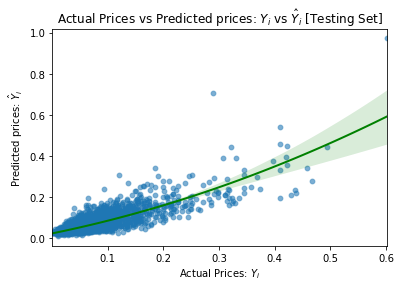

In [18]:
sns.scatterplot(y_test, y_test_predict, alpha=0.4)
sns.regplot(y_test, y_test_predict, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Testing Set]")
 
plt.show()

***
### K-nearest neighbors (KNN) model
***
In this section, the model speficied in the regression section is rerun through the K-nearest neighbors (KNN) model

#### This is a preliminary step towards the definition of a suitable k through the Elbow Method

In [19]:
# the cluster model is built and the distortion and inertia are calculated
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # The model is built and fitted
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [20]:
# Results for distortion are distorted

for key, val, in mapping1.items():
    print(f'{key}:{val}')

1:0.3745085888565497
2:0.28902675891305396
3:0.2564913875749446
4:0.22853088112389022
5:0.1955646989337615
6:0.18570161448634648
7:0.18035823085654426
8:0.17172059340137963
9:0.16624106901601116


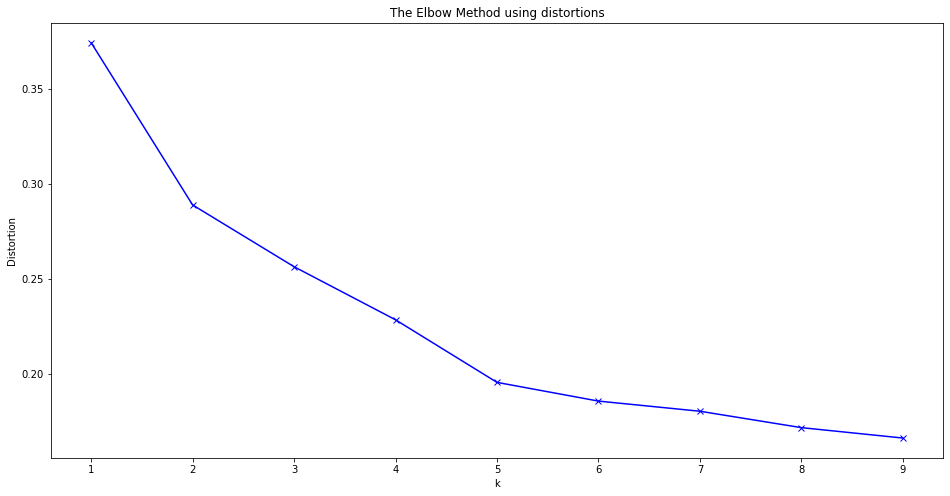

In [21]:
#These are the results for the elbow method using the distortions. The strange shape of the plot does not 
#suggest any clear value for k.
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method using distortions')
plt.show()

In [22]:
# The results for the inertia are tabulated
for key, val in mapping2.items():
    print(f'{key}:{val}')

1:4054.7575914499816
2:2987.611490618505
3:2134.809813427179
4:1562.6825425270542
5:1276.3570651552434
6:1185.9456940485777
7:1043.7182949350047
8:943.3793617174366
9:867.5795345996959


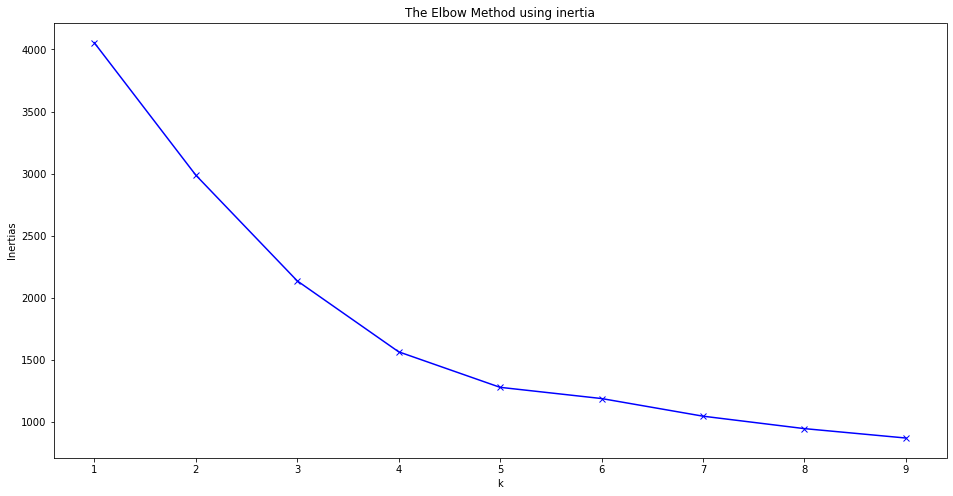

In [23]:
# These are the result using Inertia. Accordign to the Elbow Method, a value like 5 or 6 could be a suitable k.
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('The Elbow Method using inertia')
plt.show()

#### Here the k-means clustering method is computed. The computed clusters have very similar properties. 

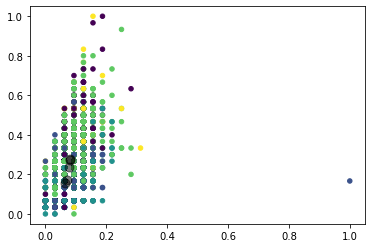

In [24]:
kmeanModel = KMeans(n_clusters=5).fit(X)
kmeanModel.fit(X)
y_kmeans=kmeanModel.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=80, alpha=0.5)
plt.show()

#### Below the method presented in class to present the plot is computed, using only the features "price", "sqft_living" and "grade"

In [25]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [26]:
new = pd.concat([X,y],axis=1)
new = new[['price','sqft_living', 'grade']].sample(n=100,random_state=100)
new.head()

,price,sqft_living,grade
7189,0.060614,0.060744,0.3
2751,0.025846,0.073652,0.4
17077,0.063566,0.193622,0.5
15151,0.052480,0.120729,0.4
985,0.075440,0.069856,0.4


#### The plot is run with a k of 5. There is not really a discernible pattern.

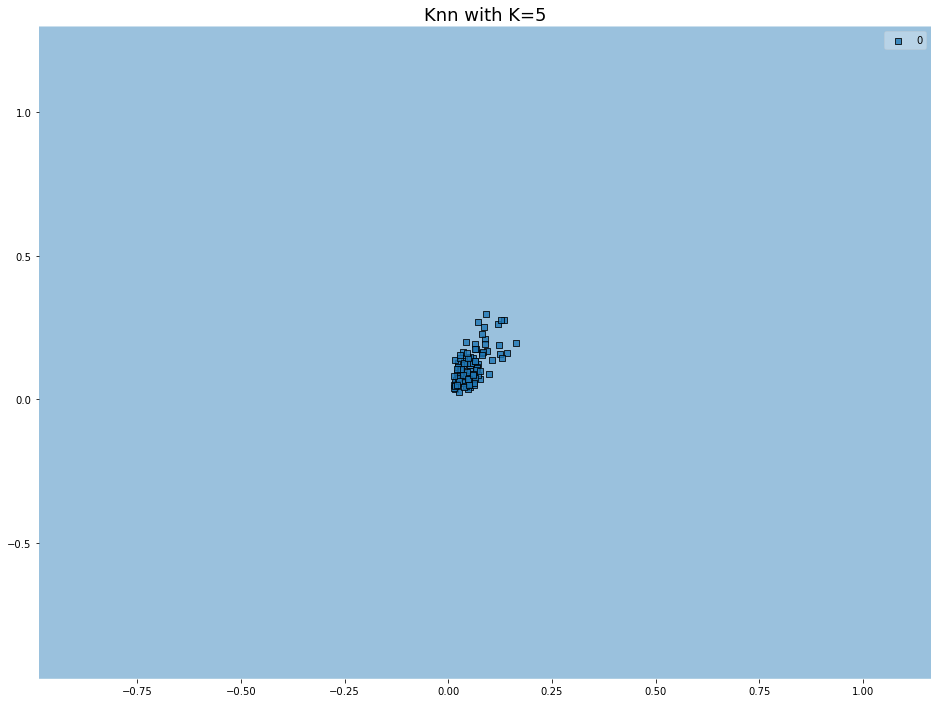

In [27]:
knn_comparison(new,5)

#### The model is now run, with a number of neighbors of 100

In [28]:
knnreg = KNeighborsRegressor(n_neighbors=100) 
knnreg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

##### Here an array of predictions is presented

In [29]:
knn_predictions = knnreg.predict(X_test)
knn_predictions

array([0.0890491 , 0.03048165, 0.05986966, ..., 0.03867403, 0.04402357,
       0.10044271])

#### These are the test statistics of the model. Notice that the R2 is lower than the linear regression case. What also stands out is the very high value of the RMSE. The cost of using the KNN model may be a much higher variance, which possibly permits to achieve a lower bias.

In [30]:
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.02
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.03
The R2 of the model in the test set is: 0.59


#### The plot below compares y_test values with predictions made by the KNN algorithm. It can be seen that the predictions are reasonably in line with the linear regression's results.

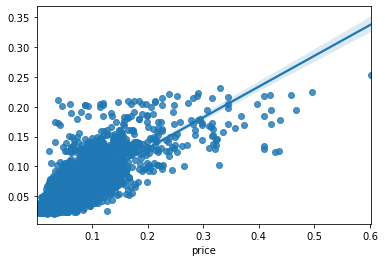

In [31]:
sns.regplot(y_test, knn_predictions);



#### This code permits to visualize different combinations of inputs and results from the KNN model for different values of K. It also permits to assess their accuracies.

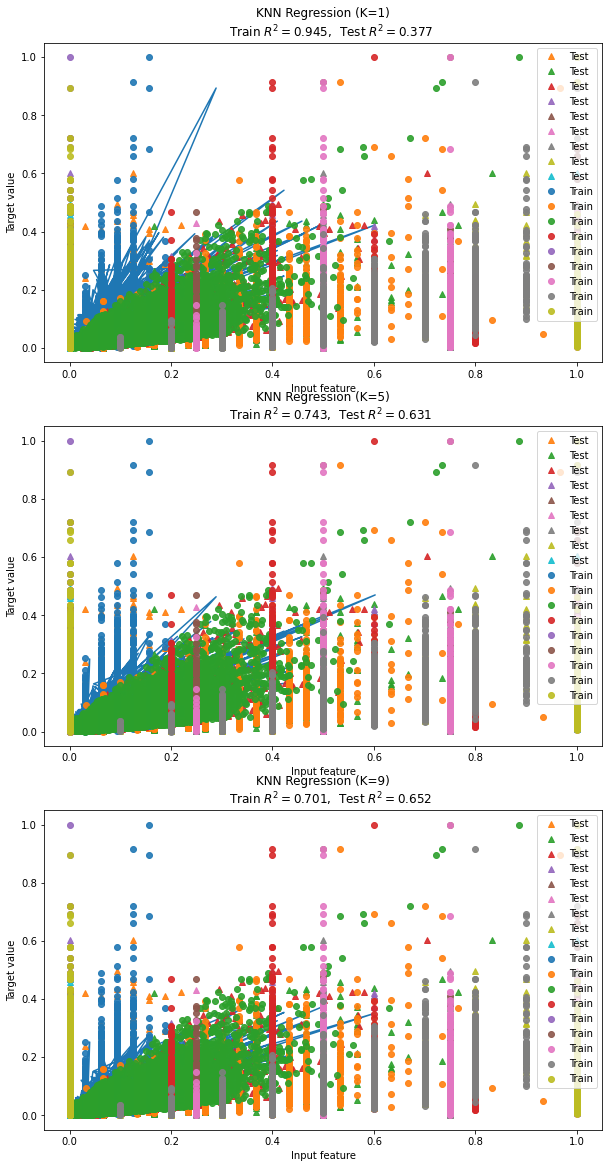

In [32]:
def plot_regression_model_complexity():
    fig, subaxes = plt.subplots(3, 1, figsize=(10,20))
    X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
    for thisaxis, K in zip(subaxes, [1, 5, 9]):
        knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
        knn_predictions = knnreg.predict(X_test)       
        train_score = knnreg.score(X_train, y_train)
        test_score = knnreg.score(X_test, y_test)
        thisaxis.plot(y_test, knn_predictions)
        thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
        thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                          .format(K, train_score, test_score))
        thisaxis.legend()
        figsize=(60,20)
plot_regression_model_complexity()

As a result, we can see that normalizing the data does not improve the machine learning algorithms
***